### Model Prediction

#### Inputs

In [1]:
import pandas as pd
import re
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

#### Predict generated and scraped dataset - V1

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


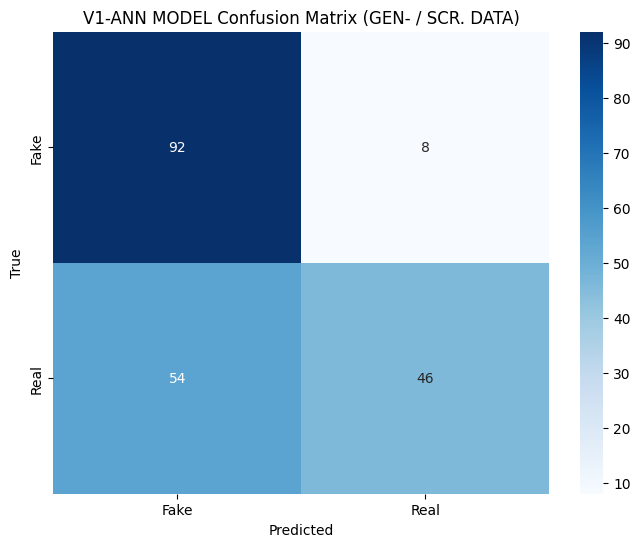

              precision    recall  f1-score   support

        Fake       0.63      0.92      0.75       100
        Real       0.85      0.46      0.60       100

    accuracy                           0.69       200
   macro avg       0.74      0.69      0.67       200
weighted avg       0.74      0.69      0.67       200



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


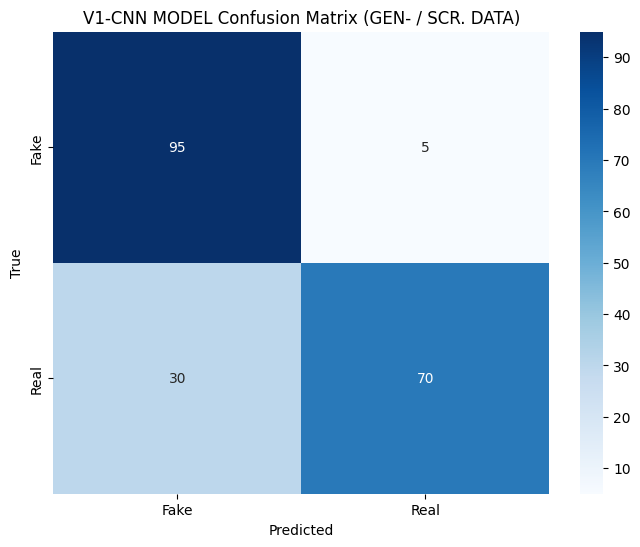

              precision    recall  f1-score   support

        Fake       0.76      0.95      0.84       100
        Real       0.93      0.70      0.80       100

    accuracy                           0.82       200
   macro avg       0.85      0.82      0.82       200
weighted avg       0.85      0.82      0.82       200



In [2]:
# Load the new datasets
generated_articles = pd.read_csv('./raw-data/generated-articles.csv')
scraped_articles = pd.read_csv('./raw-data/scraped-articles.csv')

# Assign labels to each dataset
generated_articles['label'] = 0
scraped_articles['label'] = 1

# Merge the datasets
new_data = pd.concat([generated_articles, scraped_articles], ignore_index=True)

# Check for cleaning data
new_data.drop_duplicates(inplace=True)

# Preprocess the text data
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

def process_text(text):
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub(r'\W', ' ', str(text))
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    words = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]
    words = [word for word in words if len(word) > 3]
    indices = np.unique(words, return_index=True)[1]
    cleaned_text = np.array(words)[np.sort(indices)].tolist()
    return cleaned_text

# Separate the text and labels
x_new = new_data.drop('label', axis=1)
y_new = new_data.label

# Process the texts
texts_new = list(x_new['text'])
cleaned_text_new = [process_text(text) for text in texts_new]

## ----
## ANN MODEL PREDICTION
## ----

# Load the saved tokenizer
with open('./models/ann-tokenizer.pkl', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Tokenize the new text data
new_sequences = tokenizer.texts_to_sequences(cleaned_text_new)

# Pad the sequences
maxlen = 150
new_padded_sequences = pad_sequences(new_sequences, maxlen=maxlen)

# Load the pre-trained model
model = load_model('./models/ann-model-v1.h5')

# Make predictions on the new data
new_predictions = model.predict(new_padded_sequences)

# Convert prediction probabilities to class labels
new_pred_labels = np.argmax(new_predictions, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_new, new_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('V1-ANN MODEL Confusion Matrix (GEN- / SCR. DATA)')
plt.show()

# Classification report
report = classification_report(y_new, new_pred_labels, target_names=['Fake', 'Real'])
print(report)

## ----
## CNN MODEL PREDICTION
## ----

# Load the saved tokenizer
with open('./models/cnn-tokenizer.pkl', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Tokenize the new text data
new_sequences = tokenizer.texts_to_sequences(cleaned_text_new)

# Pad the sequences
maxlen = 150
new_padded_sequences = pad_sequences(new_sequences, maxlen=maxlen)

# Load the pre-trained model
model = load_model('./models/cnn-model-v1.h5')

# Make predictions on the new data
new_predictions = model.predict(new_padded_sequences)

# Convert prediction probabilities to class labels
new_pred_labels = np.argmax(new_predictions, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_new, new_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('V1-CNN MODEL Confusion Matrix (GEN- / SCR. DATA)')
plt.show()

# Classification report
report = classification_report(y_new, new_pred_labels, target_names=['Fake', 'Real'])
print(report)

#### Predict generated and scraped dataset - V2

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


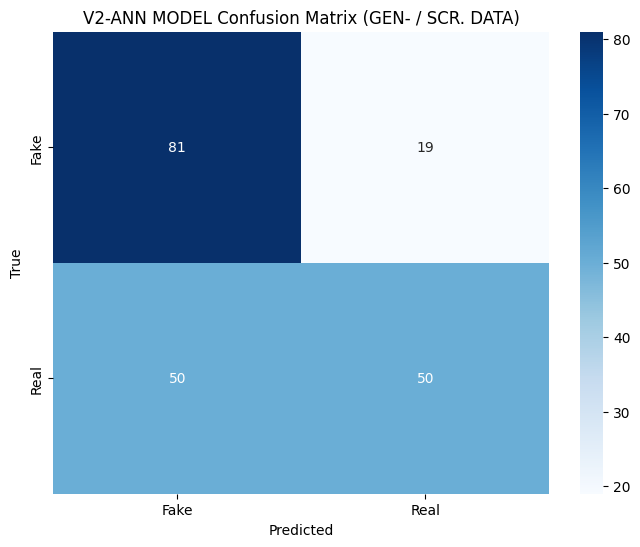

              precision    recall  f1-score   support

        Fake       0.62      0.81      0.70       100
        Real       0.72      0.50      0.59       100

    accuracy                           0.66       200
   macro avg       0.67      0.66      0.65       200
weighted avg       0.67      0.66      0.65       200



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


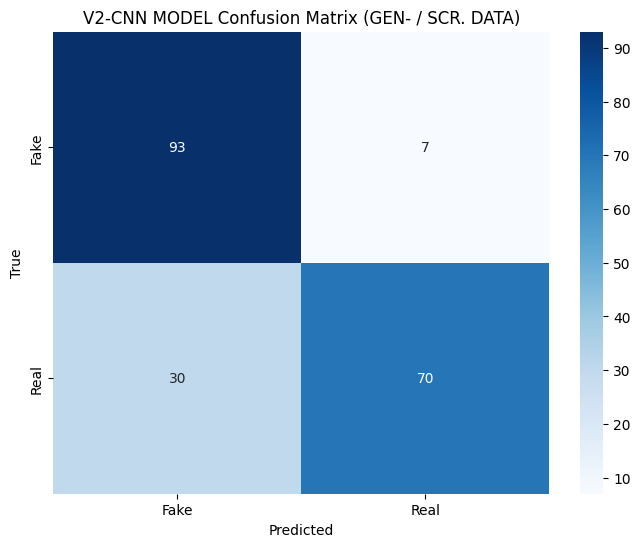

              precision    recall  f1-score   support

        Fake       0.76      0.93      0.83       100
        Real       0.91      0.70      0.79       100

    accuracy                           0.81       200
   macro avg       0.83      0.81      0.81       200
weighted avg       0.83      0.81      0.81       200



In [3]:
# Load the new datasets
generated_articles = pd.read_csv('./raw-data/generated-articles.csv')
scraped_articles = pd.read_csv('./raw-data/scraped-articles.csv')

# Assign labels to each dataset
generated_articles['label'] = 0
scraped_articles['label'] = 1

# Merge the datasets
new_data = pd.concat([generated_articles, scraped_articles], ignore_index=True)

# Check for cleaning data
new_data.drop_duplicates(inplace=True)

# Preprocess the text data
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

def process_text(text):
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub(r'\W', ' ', str(text))
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    words = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]
    words = [word for word in words if len(word) > 3]
    indices = np.unique(words, return_index=True)[1]
    cleaned_text = np.array(words)[np.sort(indices)].tolist()
    return cleaned_text

# Separate the text and labels
x_new = new_data.drop('label', axis=1)
y_new = new_data.label

# Process the texts
texts_new = list(x_new['text'])
cleaned_text_new = [process_text(text) for text in texts_new]

## ----
## ANN MODEL PREDICTION
## ----

# Load the saved tokenizer
with open('./models/ann-tokenizer.pkl', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Tokenize the new text data
new_sequences = tokenizer.texts_to_sequences(cleaned_text_new)

# Pad the sequences
maxlen = 150
new_padded_sequences = pad_sequences(new_sequences, maxlen=maxlen)

# Load the pre-trained model
model = load_model('./models/ann-model-v2.h5')

# Make predictions on the new data
new_predictions = model.predict(new_padded_sequences)

# Convert prediction probabilities to class labels
new_pred_labels = np.argmax(new_predictions, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_new, new_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('V2-ANN MODEL Confusion Matrix (GEN- / SCR. DATA)')
plt.show()

# Classification report
report = classification_report(y_new, new_pred_labels, target_names=['Fake', 'Real'])
print(report)

## ----
## CNN MODEL PREDICTION
## ----

# Load the saved tokenizer
with open('./models/cnn-tokenizer.pkl', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Tokenize the new text data
new_sequences = tokenizer.texts_to_sequences(cleaned_text_new)

# Pad the sequences
maxlen = 150
new_padded_sequences = pad_sequences(new_sequences, maxlen=maxlen)

# Load the pre-trained model
model = load_model('./models/cnn-model-v2.h5')

# Make predictions on the new data
new_predictions = model.predict(new_padded_sequences)

# Convert prediction probabilities to class labels
new_pred_labels = np.argmax(new_predictions, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_new, new_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('V2-CNN MODEL Confusion Matrix (GEN- / SCR. DATA)')
plt.show()

# Classification report
report = classification_report(y_new, new_pred_labels, target_names=['Fake', 'Real'])
print(report)

#### Predict second dataset from Kaggle - V1

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


2232/2232 ━━━━━━━━━━━━━━━━━━━━ 2s 694us/step


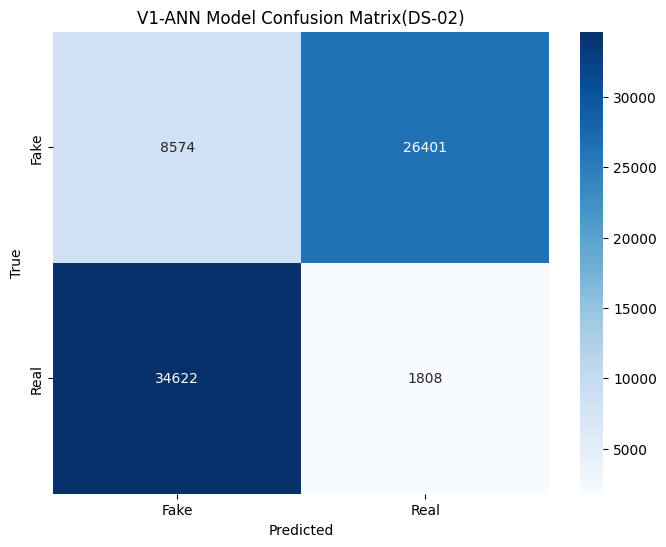

              precision    recall  f1-score   support

        Fake       0.20      0.25      0.22     34975
        Real       0.06      0.05      0.06     36430

    accuracy                           0.15     71405
   macro avg       0.13      0.15      0.14     71405
weighted avg       0.13      0.15      0.14     71405



2232/2232 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step


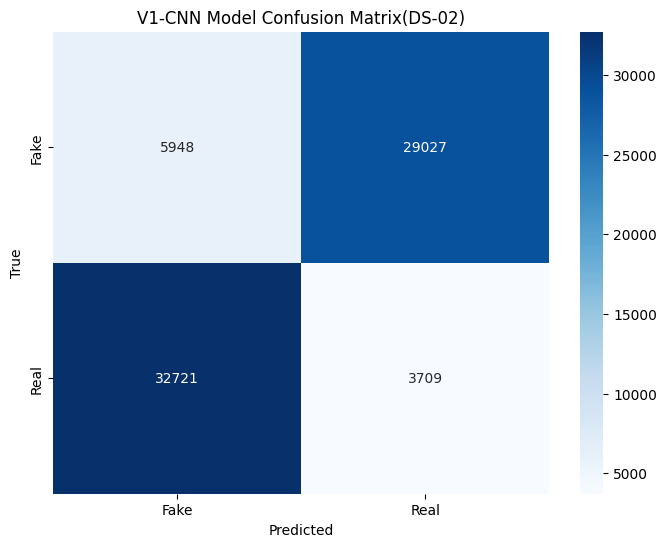

              precision    recall  f1-score   support

        Fake       0.15      0.17      0.16     34975
        Real       0.11      0.10      0.11     36430

    accuracy                           0.14     71405
   macro avg       0.13      0.14      0.13     71405
weighted avg       0.13      0.14      0.13     71405



In [7]:
# Load the new dataset
new_data = pd.read_csv('./raw-data/dataset-02.csv')

# Preprocess the text data
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

def process_text(text):
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub(r'\W', ' ', str(text))
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    words = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]
    words = [word for word in words if len(word) > 3]
    indices = np.unique(words, return_index=True)[1]
    cleaned_text = np.array(words)[np.sort(indices)].tolist()
    return cleaned_text

# Separate the text and labels
x_new = new_data.drop('label', axis=1)
y_new = new_data.label

# Process the texts
texts_new = list(x_new['text'])
cleaned_text_new = [process_text(text) for text in texts_new]

## ----
## ANN MODEL PREDICTION
## ----

# Load the pre-trained tokenizer
with open('./models/ann-tokenizer.pkl', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Tokenize the new text data
new_sequences = tokenizer.texts_to_sequences(cleaned_text_new)

# Pad the sequences
maxlen = 150
new_padded_sequences = pad_sequences(new_sequences, maxlen=maxlen)

# Load the pre-trained model
model = load_model('./models/ann-model-v1.h5')

# Make predictions on the new data
new_predictions = model.predict(new_padded_sequences)

# Convert prediction probabilities to class labels
new_pred_labels = np.argmax(new_predictions, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_new, new_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('V1-ANN Model Confusion Matrix(DS-02)')
plt.show()

# Classification report
report = classification_report(y_new, new_pred_labels, target_names=['Fake', 'Real'])
print(report)

## ----
## CNN MODEL PREDICTION
## ----

# Load the pre-trained tokenizer
with open('./models/cnn-tokenizer.pkl', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Tokenize the new text data
new_sequences = tokenizer.texts_to_sequences(cleaned_text_new)

# Pad the sequences
maxlen = 150
new_padded_sequences = pad_sequences(new_sequences, maxlen=maxlen)

# Load the pre-trained model
model = load_model('./models/cnn-model-v1.h5')

# Make predictions on the new data
new_predictions = model.predict(new_padded_sequences)

# Convert prediction probabilities to class labels
new_pred_labels = np.argmax(new_predictions, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_new, new_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('V1-CNN Model Confusion Matrix(DS-02)')
plt.show()

# Classification report
report = classification_report(y_new, new_pred_labels, target_names=['Fake', 'Real'])
print(report)

#### Predict second dataset from Kaggle - V2

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


2232/2232 ━━━━━━━━━━━━━━━━━━━━ 2s 729us/step


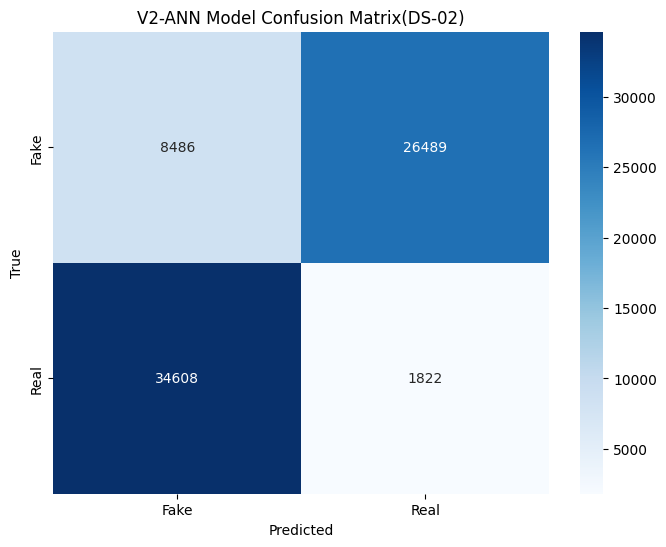

              precision    recall  f1-score   support

        Fake       0.20      0.24      0.22     34975
        Real       0.06      0.05      0.06     36430

    accuracy                           0.14     71405
   macro avg       0.13      0.15      0.14     71405
weighted avg       0.13      0.14      0.14     71405



2232/2232 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step


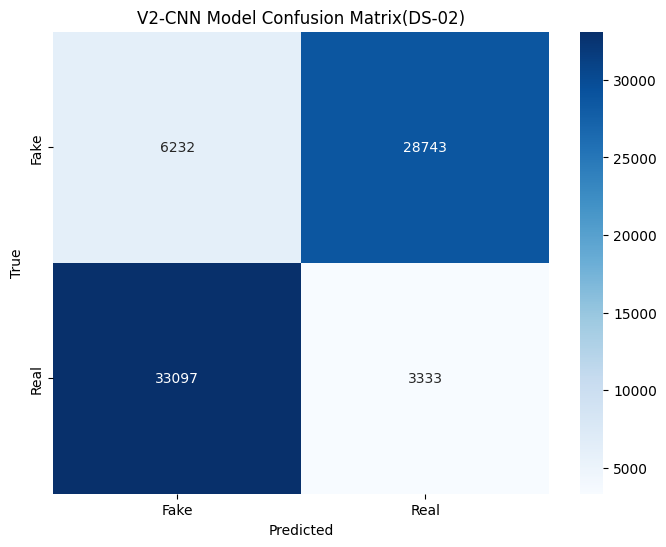

              precision    recall  f1-score   support

        Fake       0.16      0.18      0.17     34975
        Real       0.10      0.09      0.10     36430

    accuracy                           0.13     71405
   macro avg       0.13      0.13      0.13     71405
weighted avg       0.13      0.13      0.13     71405



In [8]:
# Load the new dataset
new_data = pd.read_csv('./raw-data/dataset-02.csv')

# Preprocess the text data
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

def process_text(text):
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub(r'\W', ' ', str(text))
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    words = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]
    words = [word for word in words if len(word) > 3]
    indices = np.unique(words, return_index=True)[1]
    cleaned_text = np.array(words)[np.sort(indices)].tolist()
    return cleaned_text

# Separate the text and labels
x_new = new_data.drop('label', axis=1)
y_new = new_data.label

# Process the texts
texts_new = list(x_new['text'])
cleaned_text_new = [process_text(text) for text in texts_new]

## ----
## ANN MODEL PREDICTION
## ----

# Load the pre-trained tokenizer
with open('./models/ann-tokenizer.pkl', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Tokenize the new text data
new_sequences = tokenizer.texts_to_sequences(cleaned_text_new)

# Pad the sequences
maxlen = 150
new_padded_sequences = pad_sequences(new_sequences, maxlen=maxlen)

# Load the pre-trained model
model = load_model('./models/ann-model-v2.h5')

# Make predictions on the new data
new_predictions = model.predict(new_padded_sequences)

# Convert prediction probabilities to class labels
new_pred_labels = np.argmax(new_predictions, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_new, new_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('V2-ANN Model Confusion Matrix(DS-02)')
plt.show()

# Classification report
report = classification_report(y_new, new_pred_labels, target_names=['Fake', 'Real'])
print(report)

## ----
## CNN MODEL PREDICTION
## ----

# Load the pre-trained tokenizer
with open('./models/cnn-tokenizer.pkl', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Tokenize the new text data
new_sequences = tokenizer.texts_to_sequences(cleaned_text_new)

# Pad the sequences
maxlen = 150
new_padded_sequences = pad_sequences(new_sequences, maxlen=maxlen)

# Load the pre-trained model
model = load_model('./models/cnn-model-v2.h5')

# Make predictions on the new data
new_predictions = model.predict(new_padded_sequences)

# Convert prediction probabilities to class labels
new_pred_labels = np.argmax(new_predictions, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_new, new_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('V2-CNN Model Confusion Matrix(DS-02)')
plt.show()

# Classification report
report = classification_report(y_new, new_pred_labels, target_names=['Fake', 'Real'])
print(report)

#### Predict generated and scraped dataset - V3

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


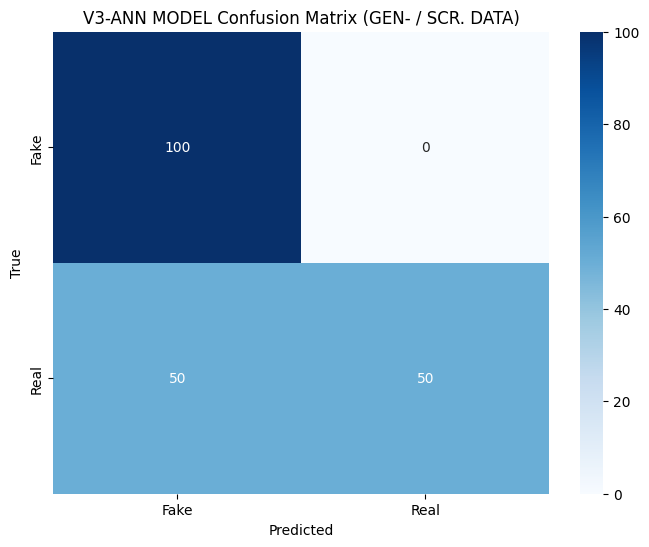

              precision    recall  f1-score   support

        Fake       0.67      1.00      0.80       100
        Real       1.00      0.50      0.67       100

    accuracy                           0.75       200
   macro avg       0.83      0.75      0.73       200
weighted avg       0.83      0.75      0.73       200



In [6]:
# Load the new datasets
generated_articles = pd.read_csv('./raw-data/generated-articles.csv')
scraped_articles = pd.read_csv('./raw-data/scraped-articles.csv')

# Assign labels to each dataset
generated_articles['label'] = 0
scraped_articles['label'] = 1

# Merge the datasets
new_data = pd.concat([generated_articles, scraped_articles], ignore_index=True)

# Check for cleaning data
new_data.drop_duplicates(inplace=True)

# Preprocess the text data
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

def process_text(text):
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub(r'\W', ' ', str(text))
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    words = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]
    words = [word for word in words if len(word) > 3]
    indices = np.unique(words, return_index=True)[1]
    cleaned_text = np.array(words)[np.sort(indices)].tolist()
    return cleaned_text

# Separate the text and labels
x_new = new_data.drop('label', axis=1)
y_new = new_data.label

# Process the texts
texts_new = list(x_new['text'])
cleaned_text_new = [process_text(text) for text in texts_new]

## ----
## ANN MODEL PREDICTION
## ----

# Load the saved tokenizer
with open('./models/ann-tokenizer.pkl', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Tokenize the new text data
new_sequences = tokenizer.texts_to_sequences(cleaned_text_new)

# Pad the sequences
maxlen = 150
new_padded_sequences = pad_sequences(new_sequences, maxlen=maxlen)

# Load the pre-trained model
model = load_model('./models/ann-model-v3.h5')

# Make predictions on the new data
new_predictions = model.predict(new_padded_sequences)

# Convert prediction probabilities to class labels
new_pred_labels = np.argmax(new_predictions, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_new, new_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('V3-ANN MODEL Confusion Matrix (GEN- / SCR. DATA)')
plt.show()

# Classification report
report = classification_report(y_new, new_pred_labels, target_names=['Fake', 'Real'])
print(report)

#### Predict second dataset from Kaggle - V3

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


2232/2232 ━━━━━━━━━━━━━━━━━━━━ 2s 705us/step


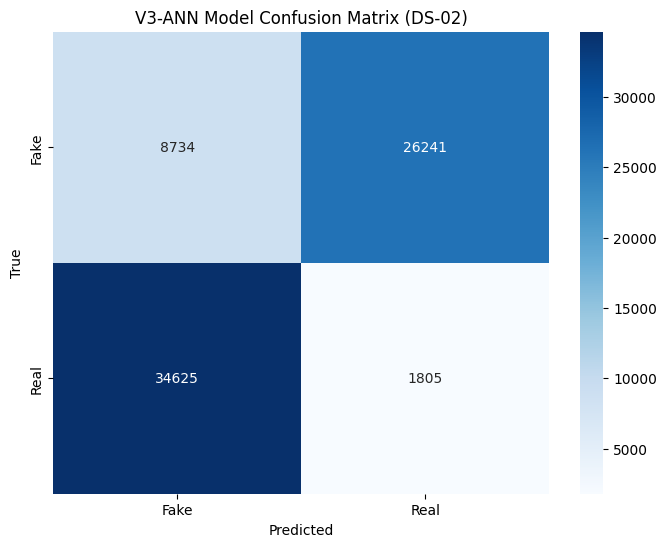

              precision    recall  f1-score   support

        Fake       0.20      0.25      0.22     34975
        Real       0.06      0.05      0.06     36430

    accuracy                           0.15     71405
   macro avg       0.13      0.15      0.14     71405
weighted avg       0.13      0.15      0.14     71405



In [9]:
# Load the new dataset
new_data = pd.read_csv('./raw-data/dataset-02.csv')

# Preprocess the text data
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

def process_text(text):
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub(r'\W', ' ', str(text))
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    words = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]
    words = [word for word in words if len(word) > 3]
    indices = np.unique(words, return_index=True)[1]
    cleaned_text = np.array(words)[np.sort(indices)].tolist()
    return cleaned_text

# Separate the text and labels
x_new = new_data.drop('label', axis=1)
y_new = new_data.label

# Process the texts
texts_new = list(x_new['text'])
cleaned_text_new = [process_text(text) for text in texts_new]

## ----
## ANN MODEL PREDICTION
## ----

# Load the pre-trained tokenizer
with open('./models/ann-tokenizer.pkl', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Tokenize the new text data
new_sequences = tokenizer.texts_to_sequences(cleaned_text_new)

# Pad the sequences
maxlen = 150
new_padded_sequences = pad_sequences(new_sequences, maxlen=maxlen)

# Load the pre-trained model
model = load_model('./models/ann-model-v3.h5')

# Make predictions on the new data
new_predictions = model.predict(new_padded_sequences)

# Convert prediction probabilities to class labels
new_pred_labels = np.argmax(new_predictions, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_new, new_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('V3-ANN Model Confusion Matrix (DS-02)')
plt.show()

# Classification report
report = classification_report(y_new, new_pred_labels, target_names=['Fake', 'Real'])
print(report)

#### Predict third dataset from Kaggle - V3

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step


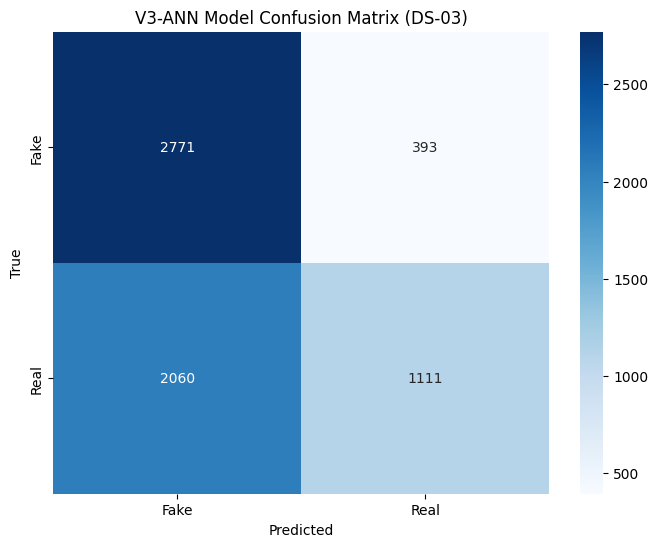

              precision    recall  f1-score   support

        Fake       0.57      0.88      0.69      3164
        Real       0.74      0.35      0.48      3171

    accuracy                           0.61      6335
   macro avg       0.66      0.61      0.58      6335
weighted avg       0.66      0.61      0.58      6335



In [11]:
# Load the new dataset
new_data = pd.read_csv('./raw-data/dataset-03.csv')

# Convert labels from 'REAL'/'FAKE' to 1/0
new_data['label'] = new_data['label'].apply(lambda x: 1 if x == 'REAL' else 0)

# Drop unnecessary columns if any
new_data = new_data.drop(columns=['title'])

# Preprocess the text data
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

def process_text(text):
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub(r'\W', ' ', str(text))
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    words = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]
    words = [word for word in words if len(word) > 3]
    indices = np.unique(words, return_index=True)[1]
    cleaned_text = np.array(words)[np.sort(indices)].tolist()
    return cleaned_text

# Separate the text and labels
x_new = new_data.drop('label', axis=1)
y_new = new_data.label

# Process the texts
texts_new = list(x_new['text'])
cleaned_text_new = [process_text(text) for text in texts_new]

## ----
## ANN MODEL PREDICTION
## ----

# Load the pre-trained tokenizer
with open('./models/ann-tokenizer.pkl', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Tokenize the new text data
new_sequences = tokenizer.texts_to_sequences(cleaned_text_new)

# Pad the sequences
maxlen = 150
new_padded_sequences = pad_sequences(new_sequences, maxlen=maxlen)

# Load the pre-trained model
model = load_model('./models/ann-model-v3.h5')

# Make predictions on the new data
new_predictions = model.predict(new_padded_sequences)

# Convert prediction probabilities to class labels
new_pred_labels = np.argmax(new_predictions, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_new, new_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('V3-ANN Model Confusion Matrix (DS-03)')
plt.show()

# Classification report
report = classification_report(y_new, new_pred_labels, target_names=['Fake', 'Real'])
print(report)
